In [194]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing the needed libraries

In [195]:
df = pd.read_csv('titanic_dataset.csv') #loading the data 

# Exploring the data

In [196]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [197]:
print(df['Cabin'].isna().sum()) #number of null values in the cabin column
print(df['Cabin'].count()) #number of values in the cabin columns that isn't null
print(df.count()[0]) #total number of values of a column 

327
91
418


(0.17, 76.0, 86)

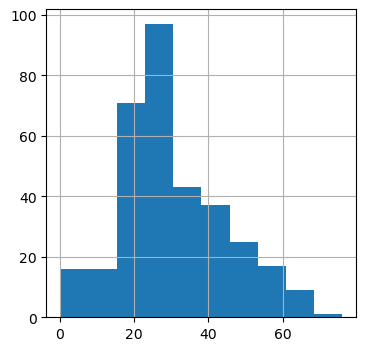

In [198]:
df.Age.hist(figsize=(4,4));
df.Age.min(),df.Age.max(),df.Age.isna().sum() 
#data looks good, no outliers but there are lots of nans that we will deal with in the upcoming phases

(3    218
 1    107
 2     93
 Name: Pclass, dtype: int64,
 0)

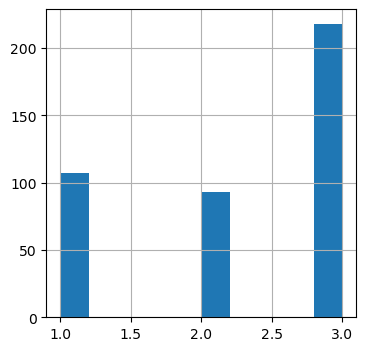

In [199]:
df.Pclass.hist(figsize=(4,4));
df.Pclass.value_counts(),df.Pclass.isna().sum()
#data looks good there is no even nan values which is great this is an essential feature in our ML model

0

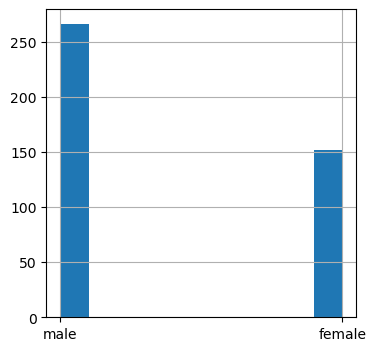

In [200]:
df.Sex.hist(figsize=(4,4));
df.Sex.isna().sum()
#good data

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [202]:
df.describe()#we can see that fare has some outliers check the max value for it 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


(14.4542, 212)

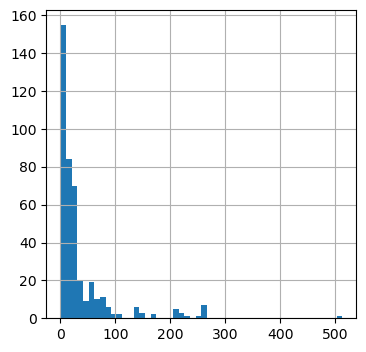

In [203]:
df.Fare.hist(bins=50,figsize=(4,4));
#if the median is about 14 and the max is 512 you know there are a lot of outliers 
df.Fare.median(),df.Fare[df.Fare>14].count()#212 value points are larger than the median 
#you can see in the histogram too the data is skewed 

# Preparing/Modifying the data for the ML model

### 'name', 'passengerid' are unique identifiers that aren't really important for model prediction and 'cabin' has too many null values so it's better for us just to delete it from our data

In [204]:
df_m = df.drop(['Name','Cabin','PassengerId','Ticket'],axis=1)
df_m.rename(columns={'SibSp':'Siblings_Spouses','Parch':'Parents_Children'},inplace=True) 
#after searching I got that these abbreviations meant this so I'm just renaming for better readability

In [205]:
df_m.info()
#now lets deal with the age's nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Sex               418 non-null    object 
 3   Age               332 non-null    float64
 4   Siblings_Spouses  418 non-null    int64  
 5   Parents_Children  418 non-null    int64  
 6   Fare              417 non-null    float64
 7   Embarked          418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [206]:
#we saw earlier that the age data had good distribuition so using the mean to fill the nan values seems appropriate 
age_mean = df_m.Age.mean()
df_m.Age.fillna(age_mean, inplace=True)
df_m.Age.isna().sum()

0

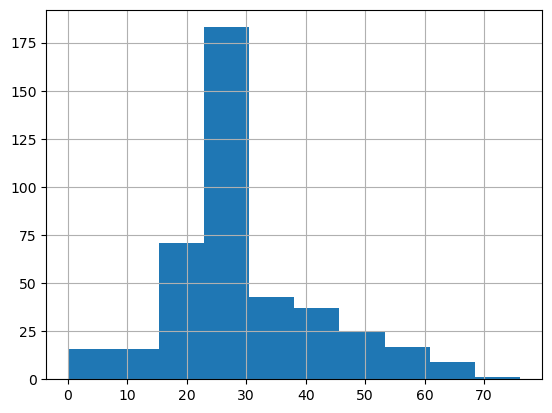

In [207]:
df_m.Age.hist(); #now lets deal with the ourliers in the fare column

In [208]:
df_m.Fare.describe() #a good way to deal with the outliers is the interquartile range or IQR

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<Axes: >

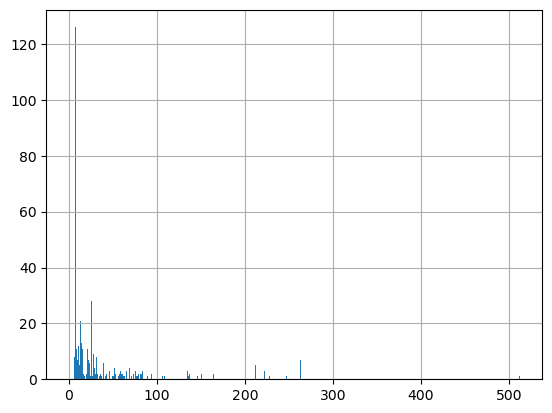

In [209]:
df_m.Fare.hist(bins=500)

In [210]:
q1 = np.nanpercentile(np.array([df_m.Fare]),0.25)
q3 = np.nanpercentile(np.array([df_m.Fare]),0.75)
iqr = q3 - q1
iqr*3

18.932004

In [211]:
k = 5 
lower_bound = q1 - (k * iqr)
upper_bound = q3 + (k * iqr)
#now lets modify fare with our new data

In [212]:
df_m=df_m[(df_m.Fare >lower_bound) & (df_m.Fare < upper_bound)]

In [213]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323 entries, 0 to 417
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          323 non-null    int64  
 1   Pclass            323 non-null    int64  
 2   Sex               323 non-null    object 
 3   Age               323 non-null    float64
 4   Siblings_Spouses  323 non-null    int64  
 5   Parents_Children  323 non-null    int64  
 6   Fare              323 non-null    float64
 7   Embarked          323 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 22.7+ KB


In [214]:
df_m.describe()

,Survived,Pclass,Age,Siblings_Spouses,Parents_Children,Fare
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,0.315789,2.554180,28.151106,0.343653,0.253870,14.146826
std,0.465551,0.658914,10.672719,0.706787,0.643126,8.087555
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.787500
50%,0.000000,3.000000,30.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,30.272590,1.000000,0.000000,21.000000
max,1.000000,3.000000,64.000000,4.000000,5.000000,37.004200


In [215]:
df_m.tail(100)
#I can see there is male, female sex / Q,S,C embarked / 1,2,3 pclass
#for better calculations I'm going to use one hot method on embarked and pclass
#for sex I'm going to replace male with 1 and female with 0

,Survived,Pclass,Sex,Age,Siblings_Spouses,Parents_Children,Fare,Embarked
280,1,3,female,23.00000,0,0,8.6625,S
281,0,3,male,0.75000,1,1,13.7750,S
282,1,3,female,30.27259,0,0,7.7500,Q
283,1,3,female,9.00000,1,1,15.2458,C
284,1,3,female,2.00000,1,1,20.2125,S
...,...,...,...,...,...,...,...,...
412,1,3,female,28.00000,0,0,7.7750,S
413,0,3,male,30.27259,0,0,8.0500,S
415,0,3,male,38.50000,0,0,7.2500,S
416,0,3,male,30.27259,0,0,8.0500,S


In [216]:
df_m = pd.get_dummies(df_m, columns=['Pclass'], prefix='Pclass')


In [217]:
df_m = pd.get_dummies(df_m, columns=['Embarked'], prefix='Embarked')

In [218]:
df_m['Sex']=df_m['Sex'].replace({'male':1,'female':0})

In [221]:
df_m.head()

,Survived,Sex,Age,Siblings_Spouses,Parents_Children,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,34.5,0,0,7.8292,0,0,1,0,1,0
1,1,0,47.0,1,0,7.0000,0,0,1,0,0,1
2,0,1,62.0,0,0,9.6875,0,1,0,0,1,0
3,0,1,27.0,0,0,8.6625,0,0,1,0,0,1
4,1,0,22.0,1,1,12.2875,0,0,1,0,0,1


# We're good to start our modeling now  
### this is a classification problem or to be more specific a binary classification problem to predict either the person survived or didn't survive so we're going to use <I>Logistic Regression </I>

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#import the required libraries

In [223]:
X = df_m.drop('Survived', axis=1)  # Features (input variables)
y = df_m['Survived']  # Target (output variable)


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Splitting the data into test and train with 80% train and 20% test
#random_state=42 is just to set the seed to 42 so we can get the same results everytime we run this jupyter notebook


In [244]:
# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=500)

# Train the model on the training data
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [245]:
y_pred = logistic_model.predict(X_test)


In [246]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Other evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        19

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

Confusion Matrix:
[[46  0]
 [ 0 19]]
